In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!python --version

Python 3.7.16


In [3]:
from datetime import datetime

now = datetime.now()
print(now)  
# 2025-10-03 14:22:15.123456

# 원하는 형식으로 문자열 변환
print(now.strftime("%Y-%m-%d %H:%M:%S"))  
# '2025-10-03 14:22:15'

2026-02-01 17:12:12.146114
2026-02-01 17:12:12


In [4]:
from datetime import datetime

date_str = "2025-10-03 14:22:15"

dt = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
print(dt)  
# 2025-10-03 14:22:15
print(type(dt))  
# <class 'datetime.datetime'>

2025-10-03 14:22:15
<class 'datetime.datetime'>


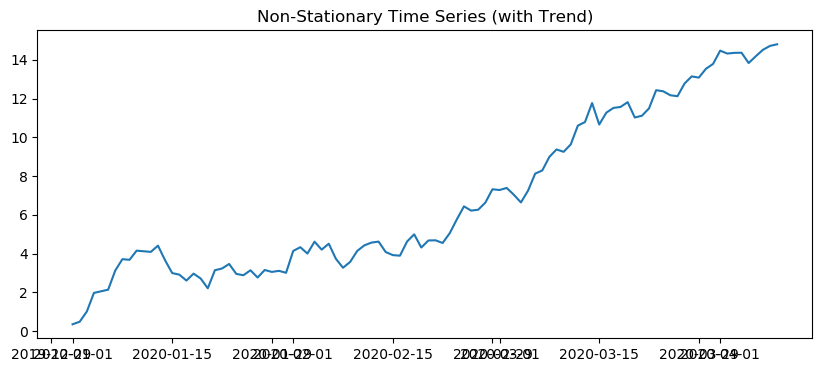

--- 비정상 시계열에 대한 ADF 검정 결과 ---
ADF Statistic: 0.027081
p-value: 0.960715
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583
귀무가설 채택 (p-value > 0.05): 시계열은 비정상 시계열입니다.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# 1. 비정상 시계열 데이터 생성 (추세 포함)
np.random.seed(42)
n_samples = 100
data_trend = np.cumsum(np.random.randn(n_samples) * 0.5 + 0.1) + np.linspace(0, 10, n_samples)
ts_non_stationary = pd.Series(data_trend, index=pd.date_range(start='2020-01-01', periods=n_samples, freq='D'))

# ADF 검정 함수
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    if result[1] <= 0.05:
        print("귀무가설 기각 (p-value <= 0.05): 시계열은 정상성을 만족합니다.")
    else:
        print("귀무가설 채택 (p-value > 0.05): 시계열은 비정상 시계열입니다.")

# 2. ADF 검정 수행 (비정상 시계열)
plt.figure(figsize=(10, 4))
plt.plot(ts_non_stationary)
plt.title('Non-Stationary Time Series (with Trend)')
plt.show()

print("--- 비정상 시계열에 대한 ADF 검정 결과 ---")
adf_test(ts_non_stationary)

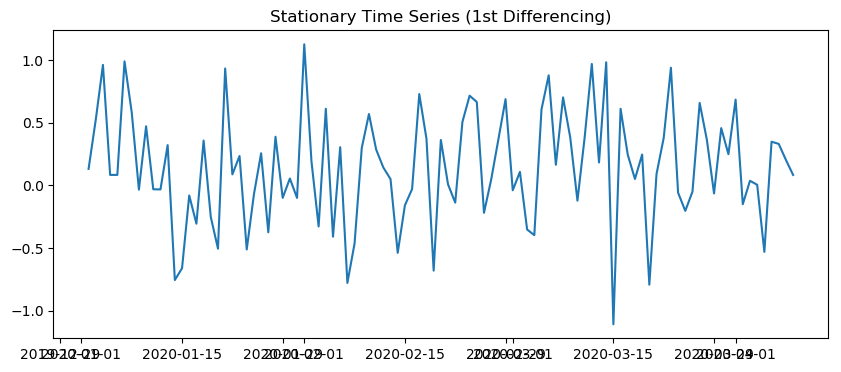


--- 1차 차분 후 시계열에 대한 ADF 검정 결과 ---
ADF Statistic: -10.008881
p-value: 0.000000
Critical Values:
	1%: -3.499
	5%: -2.892
	10%: -2.583
귀무가설 기각 (p-value <= 0.05): 시계열은 정상성을 만족합니다.


In [6]:
# 3. 1차 차분 수행하여 정상 시계열로 변환
ts_stationary = ts_non_stationary.diff().dropna()

plt.figure(figsize=(10, 4))
plt.plot(ts_stationary)
plt.title('Stationary Time Series (1st Differencing)')
plt.show()

# 4. ADF 검정 수행 (정상 시계열)
print("\n--- 1차 차분 후 시계열에 대한 ADF 검정 결과 ---")
adf_test(ts_stationary)

In [3]:
import pandas as pd
import numpy as np

# 날짜 인덱스 (한 달)
dates = pd.date_range(start="2021-01-01", end="2021-01-31", freq="D")

# 값 생성
values = np.random.randn(len(dates))

# 예제 시계열 데이터 생성
ts = pd.Series(values, index=dates)

In [11]:
# 원본 데이터 상위 5개
print(ts.head())
'''
2021-01-01    1.624345
2021-01-02   -0.611756
2021-01-03   -0.528172
2021-01-04   -1.072969
2021-01-05    0.865408
'''
# 전날 데이터를 옮긴 후 데이터
print(ts.shift().head())
'''
2021-01-01         NaN
2021-01-02    1.624345
2021-01-03   -0.611756
2021-01-04   -0.528172
2021-01-05   -1.072969
'''
# 3일 후의 데이터를 옮긴 후 데이터
print(ts.shift(-3).head())

2021-01-01    0.068563
2021-01-02   -1.062304
2021-01-03    0.473592
2021-01-04   -0.919424
2021-01-05    1.549934
Freq: D, dtype: float64
2021-01-01         NaN
2021-01-02    0.068563
2021-01-03   -1.062304
2021-01-04    0.473592
2021-01-05   -0.919424
Freq: D, dtype: float64
2021-01-01   -0.919424
2021-01-02    1.549934
2021-01-03   -0.783253
2021-01-04   -0.322062
2021-01-05    0.813517
Freq: D, dtype: float64


In [12]:
# 원본 데이터 상위 5개
print(ts.head())
'''
2021-01-01    1.624345
2021-01-02   -0.611756
2021-01-03   -0.528172
2021-01-04   -1.072969
2021-01-05    0.865408
'''
# 전날 데이터를 뺀 값
print(ts.diff().head())
'''
2021-01-01         NaN
2021-01-02   -2.236102
2021-01-03    0.083585
2021-01-04   -0.544797
2021-01-05    1.938376
'''
# 3일 전의 데이터를 뺀 값
print(ts.diff(3).head())
'''
2021-01-01         NaN
2021-01-02         NaN
2021-01-03         NaN
2021-01-04   -2.697314
2021-01-05    1.477164
'''

2021-01-01    0.068563
2021-01-02   -1.062304
2021-01-03    0.473592
2021-01-04   -0.919424
2021-01-05    1.549934
Freq: D, dtype: float64
2021-01-01         NaN
2021-01-02   -1.130867
2021-01-03    1.535896
2021-01-04   -1.393017
2021-01-05    2.469359
Freq: D, dtype: float64
2021-01-01         NaN
2021-01-02         NaN
2021-01-03         NaN
2021-01-04   -0.987987
2021-01-05    2.612238
Freq: D, dtype: float64


'\n2021-01-01         NaN\n2021-01-02         NaN\n2021-01-03         NaN\n2021-01-04   -2.697314\n2021-01-05    1.477164\n'

In [13]:
# 원본 데이터 상위 5개
print(ts.head())
'''
2021-01-01    1.624345
2021-01-02   -0.611756
2021-01-03   -0.528172
2021-01-04   -1.072969
2021-01-05    0.865408
'''
# 3일간의 평균값
print(ts.resample("3D").mean().head())
'''
2021-01-01    0.161472
2021-01-04   -0.836367
2021-01-07    0.434215
2021-01-10   -0.282468
2021-01-13    0.142433
'''
# 주간 평균값
print(ts.resample("W").mean().head())
'''
2021-01-03    0.161472
2021-01-10   -0.207975
2021-01-17   -0.206151
2021-01-24    0.170766
2021-01-31   -0.181532
'''
# 월간 평균값
print(ts.resample("M").mean().head())
'''
2021-01-31   -0.080317
2021-02-28    0.075127
2021-03-31    0.186964
2021-04-30   -0.036879
2021-05-31    0.183157
'''

2021-01-01    0.068563
2021-01-02   -1.062304
2021-01-03    0.473592
2021-01-04   -0.919424
2021-01-05    1.549934
Freq: D, dtype: float64
2021-01-01   -0.173383
2021-01-04   -0.050914
2021-01-07   -0.246470
2021-01-10   -0.024294
2021-01-13    0.408780
Freq: 3D, dtype: float64
2021-01-03   -0.173383
2021-01-10   -0.094956
2021-01-17   -0.233058
2021-01-24    0.180167
2021-01-31    0.128987
Freq: W-SUN, dtype: float64
2021-01-31   -0.021038
Freq: M, dtype: float64


'\n2021-01-31   -0.080317\n2021-02-28    0.075127\n2021-03-31    0.186964\n2021-04-30   -0.036879\n2021-05-31    0.183157\n'

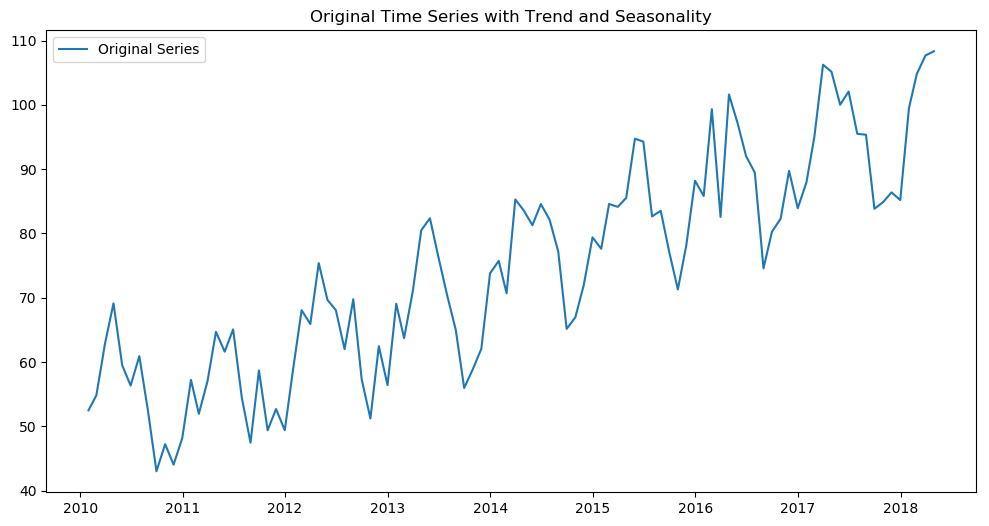

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# 시계열 데이터 생성 (추세와 계절성 포함)
np.random.seed(42)
dates = pd.date_range(start='2010-01-01', periods=100, freq='M')
data = 50 + np.arange(100) * 0.5 + 10 * np.sin(np.arange(100) * 2 * np.pi / 12) + np.random.randn(100) * 5
ts = pd.Series(data, index=dates)

plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Series')
plt.title('Original Time Series with Trend and Seasonality')
plt.legend()
plt.show()

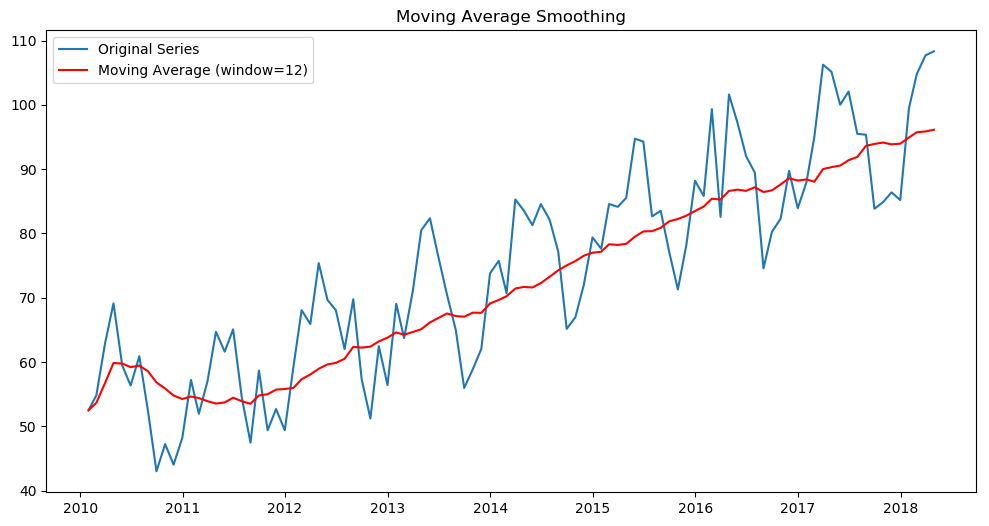

In [16]:
ts_ma = ts.rolling(window=12, min_periods=1).mean()

plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Series')
plt.plot(ts_ma, label='Moving Average (window=12)', color='red')
plt.title('Moving Average Smoothing')
plt.legend()
plt.show()

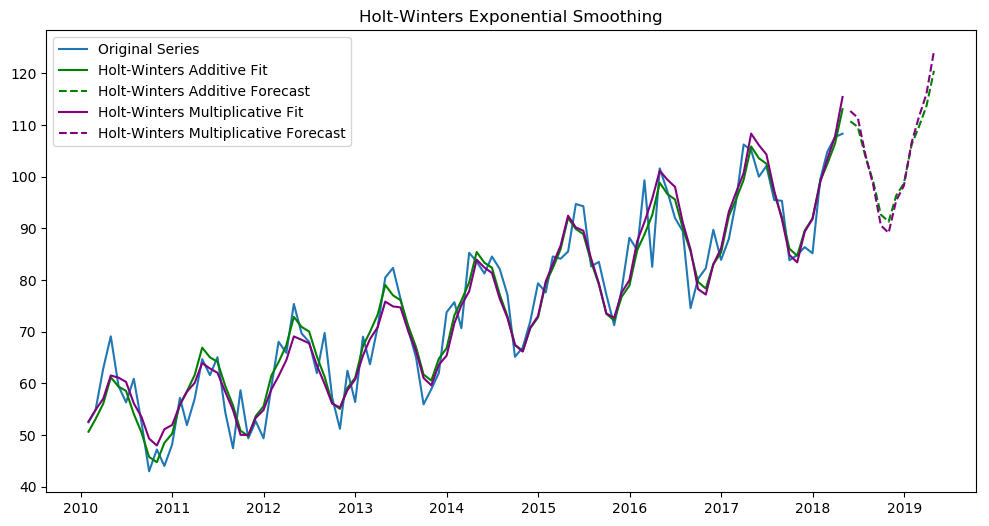


Holt-Winters Additive 모델 파라미터:
{'smoothing_level': 1.490357349396311e-08, 'smoothing_trend': 1.5506792541277399e-09, 'smoothing_seasonal': 4.850882288481234e-12, 'damping_trend': nan, 'initial_level': 14.671240384966252, 'initial_trend': 0.0807837526975245, 'initial_seasons': array([ 0.02042151,  0.38784472,  0.85317308,  1.66441441,  1.27203734,
        1.04562588,  0.1677447 , -0.58222219, -1.55523605, -1.83619808,
       -1.1945736 , -0.93672545]), 'use_boxcox': True, 'lamda': 0.5724162939630206, 'remove_bias': False}


In [17]:
# 덧셈 모델 (Additive Model)
fit_add = ExponentialSmoothing(ts, seasonal_periods=12, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated").fit()
pred_add = fit_add.forecast(12) # 12개월 예측

# 곱셈 모델 (Multiplicative Model)
fit_mul = ExponentialSmoothing(ts, seasonal_periods=12, trend='mul', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit()
pred_mul = fit_mul.forecast(12) # 12개월 예측

plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Series')
plt.plot(fit_add.fittedvalues, label='Holt-Winters Additive Fit', color='green')
plt.plot(pred_add, label='Holt-Winters Additive Forecast', color='green', linestyle='--')
plt.plot(fit_mul.fittedvalues, label='Holt-Winters Multiplicative Fit', color='purple')
plt.plot(pred_mul, label='Holt-Winters Multiplicative Forecast', color='purple', linestyle='--')
plt.title('Holt-Winters Exponential Smoothing')
plt.legend()
plt.show()

print("\nHolt-Winters Additive 모델 파라미터:")
print(fit_add.params)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 시계열 데이터 생성 (예시)
np.random.seed(42)
date_rng = pd.date_range(start='2020-01-01', end='2022-12-31', freq='M')
data = np.random.randn(len(date_rng)) + np.linspace(0, 20, len(date_rng)) # 추세 추가
ts = pd.Series(data, index=date_rng)

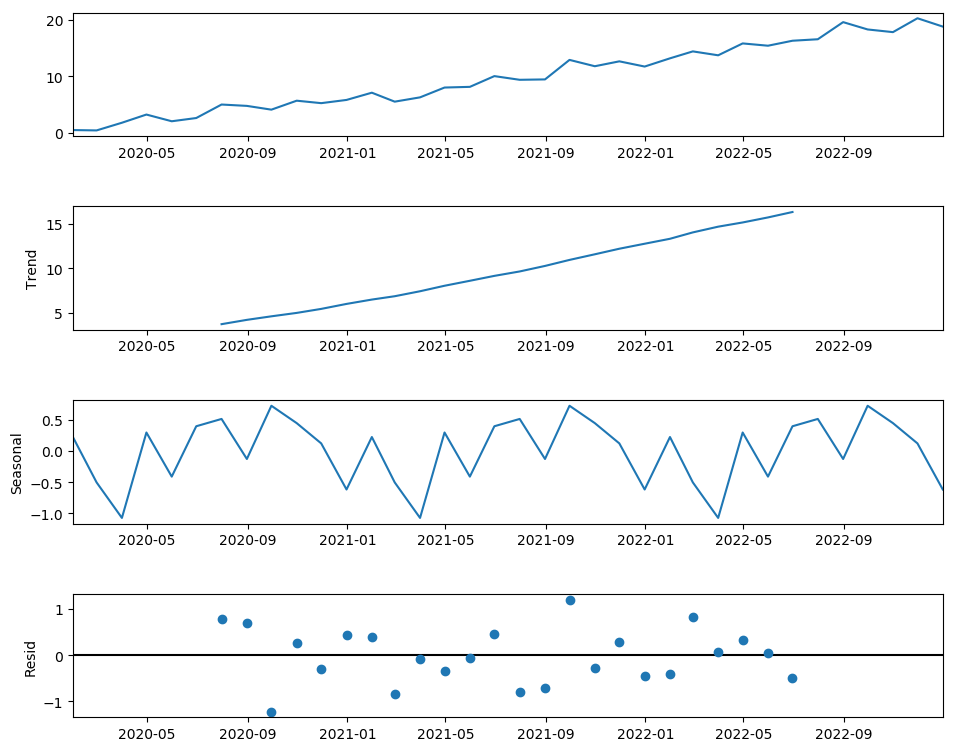

In [19]:
# 시계열 분해
# model: 'additive' 또는 'multiplicative'
decomposition = seasonal_decompose(ts, model='additive', period=12)

fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

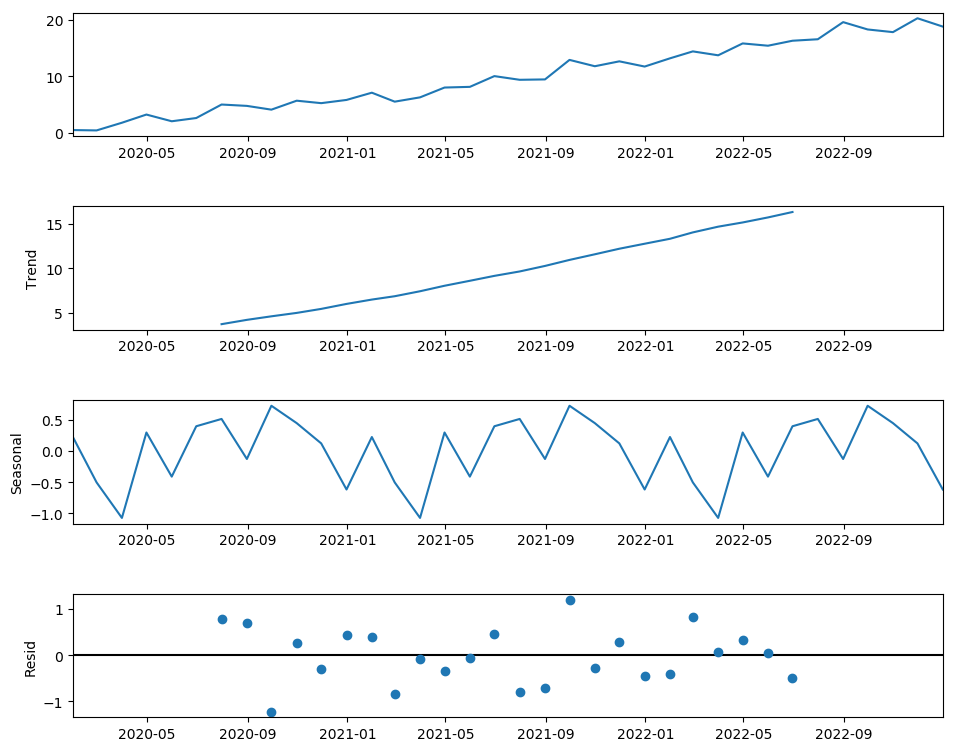

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 시계열 데이터 생성 (예시)
np.random.seed(42)
date_rng = pd.date_range(start='2020-01-01', end='2022-12-31', freq='M')
data = np.random.randn(len(date_rng)) + np.linspace(0, 20, len(date_rng)) # 추세 추가
ts = pd.Series(data, index=date_rng)

# 시계열 분해
# model: 'additive' 또는 'multiplicative'
decomposition = seasonal_decompose(ts, model='additive', period=12)

fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

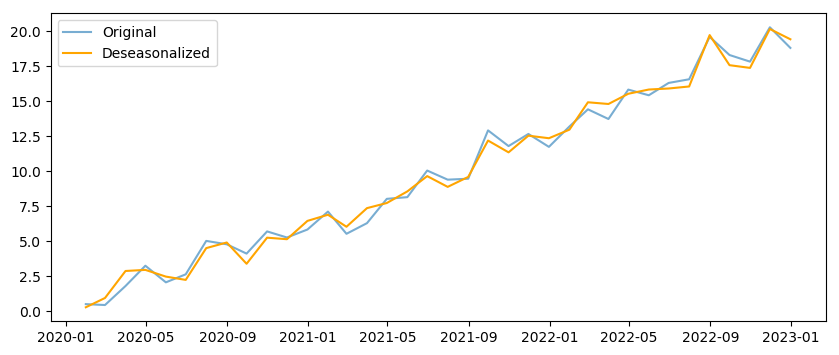

In [21]:
# 각 구성 요소 접근
observed = decomposition.observed     # 원본 시계열
trend = decomposition.trend           # 추세 (Trend)
seasonal = decomposition.seasonal     # 계절성 (Seasonality)
resid = decomposition.resid           # 불규칙(잔차, Residual)

# 계절성 제거(비계절화 시계열)
deseasonalized = observed - seasonal

# 추세 제거(중심화)
detrended = observed - trend

# 불규칙 성분만 보기
resid_only = resid.dropna()

# 결과 확인
plt.figure(figsize=(10, 4))
plt.plot(observed, label='Original', alpha=0.6)
plt.plot(deseasonalized, label='Deseasonalized', color='orange')
plt.legend()
plt.show()

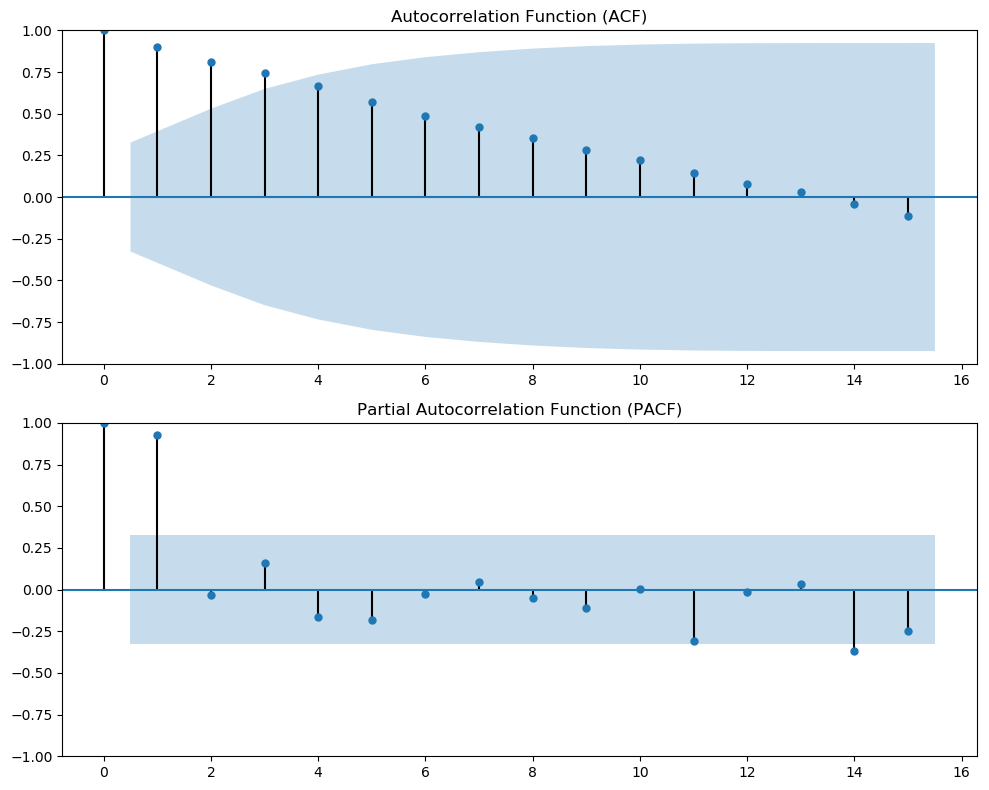

In [22]:
# ACF 및 PACF 플롯
# lags: 확인할 시차의 수
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(ts, lags=15, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')
plot_pacf(ts, lags=15, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

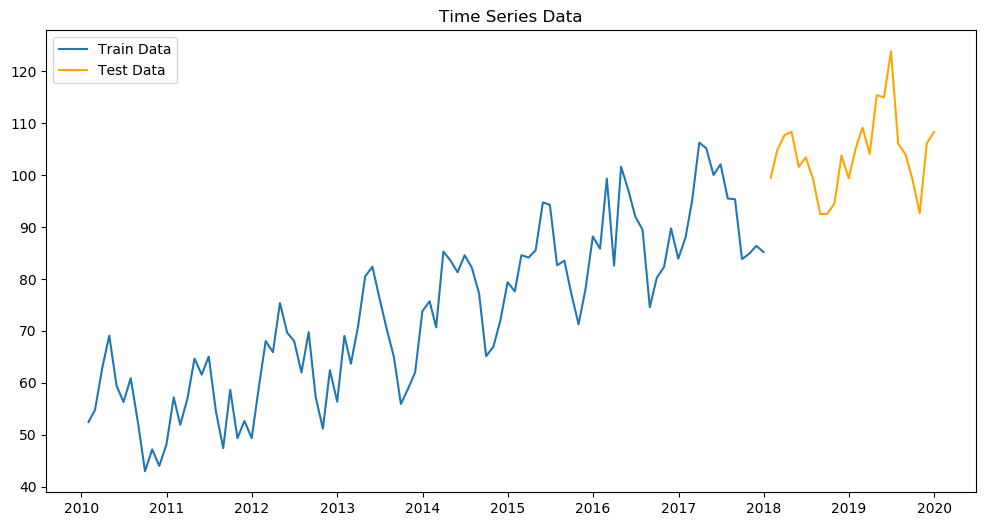

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 시계열 데이터 생성 (예시: 추세, 계절성, 노이즈 포함)
np.random.seed(42)
dates = pd.date_range(start='2010-01-01', periods=120, freq='M') # 10년치 월별 데이터
data = 50 + np.arange(120) * 0.5 + 10 * np.sin(np.arange(120) * 2 * np.pi / 12) + np.random.randn(120) * 5
ts = pd.Series(data, index=dates)

# 훈련/테스트 데이터 분할
train_size = int(len(ts) * 0.8)
train_data, test_data = ts[0:train_size], ts[train_size:]

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data', color='orange')
plt.title('Time Series Data')
plt.legend()
plt.show()

In [24]:
# ADF 검정 함수
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    if result[1] <= 0.05:
        print("귀무가설 기각 (p-value <= 0.05): 시계열은 정상성을 만족합니다.")
    else:
        print("귀무가설 채택 (p-value > 0.05): 시계열은 비정상 시계열입니다.")
# 차분 (d) 결정: ADF 검정 또는 시각적 확인
# (이 예시에서는 추세가 있으므로 1차 차분 필요)
ts_diff = train_data.diff().dropna()
adf_test(ts_diff) # 정상성 검정 수행

ADF Statistic: -6.322415
p-value: 0.000000
Critical Values:
	1%: -3.513
	5%: -2.897
	10%: -2.586
귀무가설 기각 (p-value <= 0.05): 시계열은 정상성을 만족합니다.


--- ARIMA 모델 결과 ---
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   96
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -319.435
Date:                Sun, 01 Feb 2026   AIC                            648.870
Time:                        17:55:11   BIC                            661.639
Sample:                    01-31-2010   HQIC                           654.030
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2914      1.179      0.247      0.805      -2.019       2.602
ar.L2          0.2891      0.736      0.393      0.694      -1.153       1.731
ma.L1         -0.5848      1.212

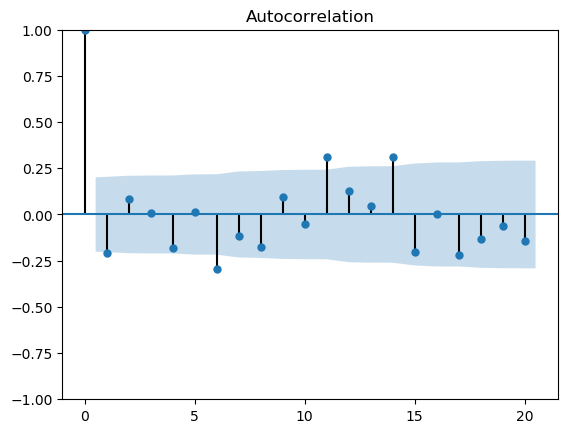

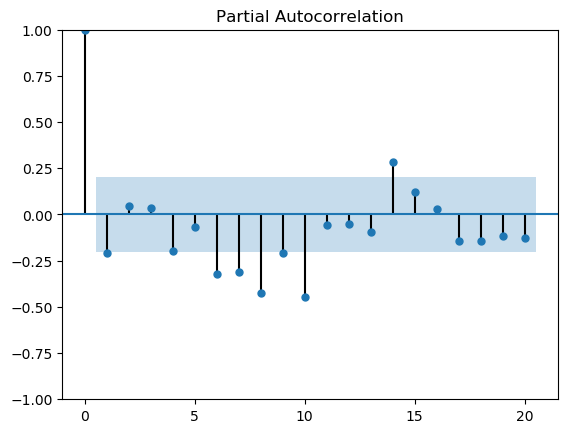

In [25]:
# AR(p) 및 MA(q) 차수 결정: ACF, PACF 플롯
plot_acf(ts_diff, lags=20)
plot_pacf(ts_diff, lags=20)
# (플롯을 보고 p, q 값 결정. 여기서는 임의로 p=2, q=2로 가정)

# ARIMA 모델 학습
# order=(p, d, q)
# p: AR 차수, d: 차분 차수, q: MA 차수
arima_model = ARIMA(train_data, order=(2, 1, 2)) # d=1 (1차 차분)
arima_results = arima_model.fit()

print("--- ARIMA 모델 결과 ---")
print(arima_results.summary())

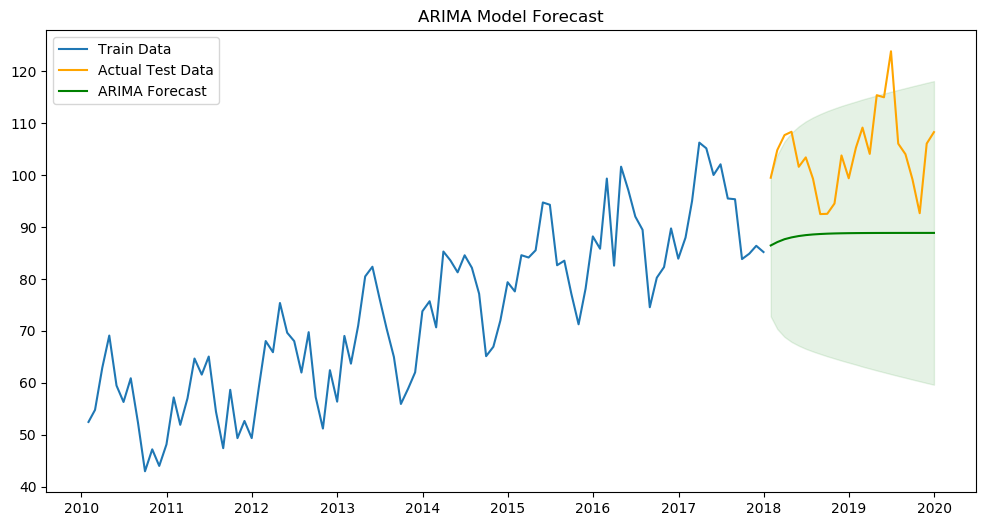

In [26]:
# 예측
# forecast(steps=예측 스텝 수)
# get_forecast(steps=예측 스텝 수).summary_frame()
forecast_steps = len(test_data)
forecast_result = arima_results.get_forecast(steps=forecast_steps)
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int() # 신뢰 구간

# 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Actual Test Data', color='orange')
plt.plot(forecast_mean, label='ARIMA Forecast', color='green')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='green', alpha=0.1)
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

In [27]:
# SARIMA 모델 (계절성 포함 시계열)
# seasonal_order=(P, D, Q, s)
# P: 계절성 AR 차수, D: 계절성 차분 차수, Q: 계절성 MA 차수, s: 계절성 주기
sarima_model = ARIMA(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) # 월별 계절성 주기 12
sarima_results = sarima_model.fit()

print("\n--- SARIMA 모델 결과 ---")
print(sarima_results.summary())


--- SARIMA 모델 결과 ---
                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                   96
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -260.213
Date:                          Sun, 01 Feb 2026   AIC                            530.426
Time:                                  17:55:33   BIC                            542.520
Sample:                              01-31-2010   HQIC                           535.285
                                   - 12-31-2017                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0901      0.159     -0.568      0.570      -0.401       0.221
ma.L1         -0.8969      0.

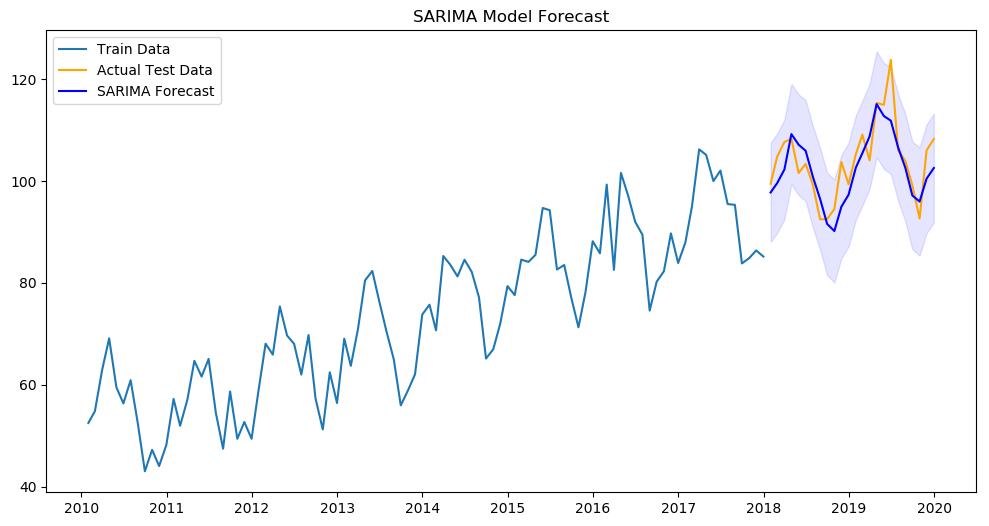

In [28]:
# 예측
sarima_forecast_result = sarima_results.get_forecast(steps=forecast_steps)
sarima_forecast_mean = sarima_forecast_result.predicted_mean
sarima_conf_int = sarima_forecast_result.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Actual Test Data', color='orange')
plt.plot(sarima_forecast_mean, label='SARIMA Forecast', color='blue')
plt.fill_between(sarima_conf_int.index, sarima_conf_int.iloc[:, 0], sarima_conf_int.iloc[:, 1], color='blue', alpha=0.1)
plt.title('SARIMA Model Forecast')
plt.legend()
plt.show()

In [29]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# 1. 데이터 생성 (두 개의 상호 연관된 시계열)
np.random.seed(42)
data = np.zeros((100, 2))
for i in range(1, 100):
    data[i, 0] = 0.5 * data[i-1, 0] + 0.2 * data[i-1, 1] + np.random.randn()
    data[i, 1] = 0.3 * data[i-1, 0] + 0.6 * data[i-1, 1] + np.random.randn()
df_var = pd.DataFrame(data, columns=['series1', 'series2'])

# 2. 정상성 확인 (ADF 검정)
# VAR 모델은 모든 시계열이 정상성을 만족해야 함.
# 비정상 시계열인 경우 차분 필요.
print("--- VAR 모델을 위한 정상성 검정 ---")
for name, series in df_var.items():
    result = adfuller(series)
    print(f'{name}: p-value = {result[1]:.3f}')
    if result[1] > 0.05:
        print(f'{name}은 비정상 시계열입니다. 차분이 필요할 수 있습니다.')
# series1: p-value = 0.000
# series2: p-value = 0.000

# 3. VAR 모델 학습
# maxlags: 고려할 최대 시차.
model_var = VAR(df_var)
results_var = model_var.fit(maxlags=5, ic='aic') # ic='aic'로 최적 시차 자동 선택
print("\n--- VAR 모델 결과 ---")
print(results_var.summary())

--- VAR 모델을 위한 정상성 검정 ---
series1: p-value = 0.000
series2: p-value = 0.000

--- VAR 모델 결과 ---
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 01, Feb, 2026
Time:                     17:55:54
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  0.0426393
Nobs:                     98.0000    HQIC:                 -0.114442
Log likelihood:          -257.276    FPE:                   0.801752
AIC:                    -0.221133    Det(Omega_mle):        0.725802
--------------------------------------------------------------------
Results for equation series1
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.154280         0.090785           -1.699           0.089
L1.series1         0.456790         0.102530         

In [30]:
# 4. 예측
lag_order = results_var.k_ar
forecast_input = df_var.values[-lag_order:]
forecast_var = results_var.forecast(y=forecast_input, steps=10)
forecast_df_var = pd.DataFrame(forecast_var, index=pd.date_range(start=df_var.index[-1] + 1, periods=10), columns=['series1_pred', 'series2_pred'])

print("\n--- VAR 예측 결과 ---")
print(forecast_df_var)


--- VAR 예측 결과 ---
                               series1_pred  series2_pred
1970-01-01 00:00:00.000000100     -0.626014     -0.165556
1970-01-02 00:00:00.000000100     -0.377418     -0.427989
1970-01-03 00:00:00.000000100     -0.335880     -0.396190
1970-01-04 00:00:00.000000100     -0.365434     -0.278766
1970-01-05 00:00:00.000000100     -0.366707     -0.214268
1970-01-06 00:00:00.000000100     -0.344499     -0.196791
1970-01-07 00:00:00.000000100     -0.324991     -0.186396
1970-01-08 00:00:00.000000100     -0.314909     -0.170514
1970-01-09 00:00:00.000000100     -0.309149     -0.154491
1970-01-10 00:00:00.000000100     -0.303900     -0.142623


In [9]:
!pip install protobuf==3.7.1

     ------------------------------------- 986.0/986.0 kB 20.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.24.4
    Uninstalling protobuf-4.24.4:
      Successfully uninstalled protobuf-4.24.4


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'c:\\users\\kangs\\miniconda3\\envs\\adp\\lib\\site-packages\\google\\~upb\\_message.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



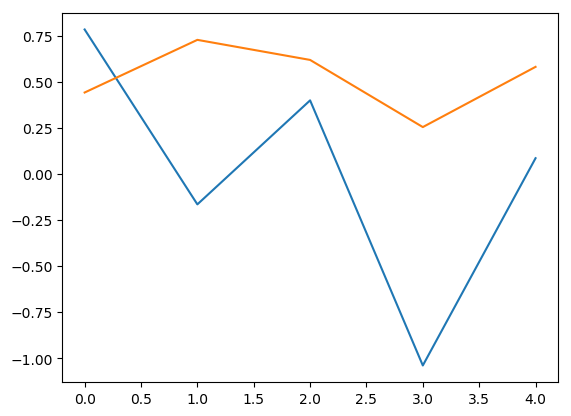

In [6]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# 1. 데이터 준비 (시계열 데이터를 지도 학습 형태로 변환)
# 예시: 이전 10일 데이터로 다음 1일 예측
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# 데이터 스케일링
scaler_lstm = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler_lstm.fit_transform(ts.values.reshape(-1, 1))

look_back = 10
X_lstm, y_lstm = create_dataset(scaled_data, look_back)

# LSTM 입력 형태 (samples, time steps, features)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))

# 훈련/테스트 분할
train_size_lstm = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[0:train_size_lstm], X_lstm[train_size_lstm:len(X_lstm)]
y_train_lstm, y_test_lstm = y_lstm[0:train_size_lstm], y_lstm[train_size_lstm:len(y_lstm)]

# 2. LSTM 모델 구축
model_lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(look_back, 1)),
    tf.keras.layers.Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')

# 3. 모델 학습
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=100, batch_size=1, verbose=0)

# 4. 예측
train_predict_lstm = model_lstm.predict(X_train_lstm)
test_predict_lstm = model_lstm.predict(X_test_lstm)

# 스케일 역변환
train_predict_lstm = scaler_lstm.inverse_transform(train_predict_lstm)
y_train_lstm_inv = scaler_lstm.inverse_transform(y_train_lstm.reshape(-1, 1))
test_predict_lstm = scaler_lstm.inverse_transform(test_predict_lstm)
y_test_lstm_inv = scaler_lstm.inverse_transform(y_test_lstm.reshape(-1, 1))

# 5. 결과 시각화 (생략, 실제 데이터와 예측값 비교)
plt.plot(y_test_lstm_inv, label='Actual')
plt.plot(test_predict_lstm, label='Predicted')
plt.show()